# Tarea semanal 4

#### Franco Ruggiero

- Diseñar un filtro pasabajos Chebyshev para obtener una atenuación de 48 dB para frecuencias mayores a 900 Hz, con una atenuación máxima de 0.4 dB desde continua hasta 300 Hz. ( Ancho de Banda reducido para canal Sub Lows )
 
| ⍺Max [dB] | ⍺mín [dB] | fp [Hz] | fs [Hz] |
|--|--|--|--|
| 0.4 | 48 | 300 | 900 |







1) Determinar el orden del filtro y el parámetro ɛ.


##### *_Calculo epsilon:_*  <center><img src="TS4_1.jpg" style="width:600px"> <center>

In [9]:
import numpy as np

alpha_max = 0.4

eeps = 10**(alpha_max/10)-1  # eeps = eps al cuadrado
eps = np.sqrt(eeps)
print('eps = ', eps )   
print('eeps = ', eeps)


eps =  0.3106093948083108
eeps =  0.09647819614318509




##### *_Iterando, obtengo el orden del filtro:_*

In [8]:
ws = 3

for n in range(2,6):
    alpha_min_c = 10 * np.log10(1 + eeps * np.cosh(n * np.arccosh(ws))**2)
    print('n = {:d}    ---    alpha_min_cheby {:f}'. format(n, alpha_min_c))

n = 5

n = 2    ---    alpha_min_cheby 15.594677
n = 3    ---    alpha_min_cheby 30.780589
n = 4    ---    alpha_min_cheby 46.087878
n = 5    ---    alpha_min_cheby 61.398796




#### *_Por lo tanto el orden sera n = 5_*

2. Obtener la expresion completa de la Transferencia NORMALIZADA de T(s).


> <center><img src="H_cheby_planteo.jpg" style="width:600px"> <center>

In [135]:
from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle
import sympy as sp

chebn_expr = Chebyshev_polynomials(n)

display(sp.expand(chebn_expr))

16*w**5 - 20*w**3 + 5*w

In [136]:
# obtengo T_ch(s) = T(s)*T(-s) 

# Tch_jw = (1/eeps) / (1/eeps + chebn_expr**2)
Tch_jw = -(1/(eeps*256)) / (-(1/eeps + chebn_expr**2)/256)
j = sp.I

Tch_s = Tch_jw.subs(w, s/j)

display(sp.expand(Tch_s))

-0.0404884228370383/(s**10 + 5*s**8/2 + 35*s**6/16 + 25*s**4/32 + 25*s**2/256 - 0.0404884228370383)

> <center><img src="T_cheby_planteo2.jpg" style="width:600px"> <center>

##### *Separo en numerador y denominador*

In [137]:
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle
import scipy.signal as sig

num_Tch_s = np.array([(-1)/(eeps*256)])
den_Tch_s = np.array([ 1 , 0 , 5/2 , 0 , 35/16 , 0 , 25/32 , 0 , 25/256 , 0 , -1/(eeps*256) ]) 

Taux = sig.TransferFunction(num_Tch_s , den_Tch_s)
pretty_print_lti(Taux)

<IPython.core.display.Math object>

In [138]:
# Obtengo las raices

roots_den_Tch_s = np.roots(den_Tch_s)
print(roots_den_Tch_s)

[ 0.11932228+1.01949544j  0.11932228-1.01949544j -0.11932228+1.01949544j
 -0.11932228-1.01949544j  0.31238979+0.63008283j  0.31238979-0.63008283j
 -0.31238979+0.63008283j -0.31238979-0.63008283j -0.38613502+0.j
  0.38613502+0.j        ]


In [139]:
# obtengo las raices de T(s) filtrando las de T(-s)

roots_den_T_s = roots_den_Tch_s[np.real(roots_den_Tch_s) < 0]
print(roots_den_T_s)


[-0.11932228+1.01949544j -0.11932228-1.01949544j -0.31238979+0.63008283j
 -0.31238979-0.63008283j -0.38613502+0.j        ]


In [146]:
# verificacion con cheblap

z,p,k = sig.cheb1ap(n, alpha_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

sos_cheb = tf2sos_analog(num_cheb, den_cheb)

pretty_print_SOS(sos_cheb)
print(' ')
pretty_print_SOS(sos_cheb, mode='omegayq')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

> #### Transferencia y diagrama de polos y ceros
>
> <center><img src="Transferencia_PyZ.jpg" style="width:600px"> <center>

3. Graficar a mano alzada en forma cualitativa la respuesta de modulo y fase. 

> <center><img src="Grafico_manual_ModuloyFase.jpg" style="width:600px"> <center>

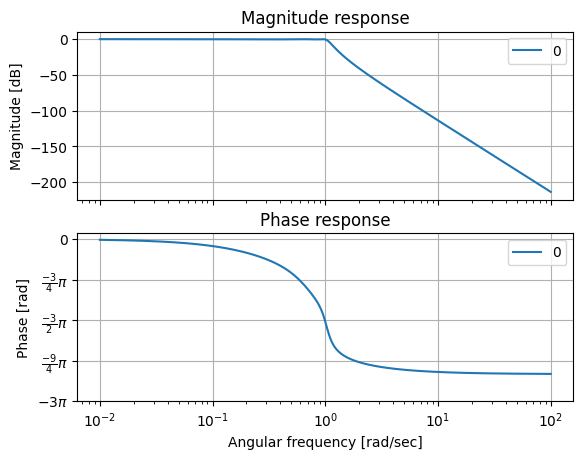

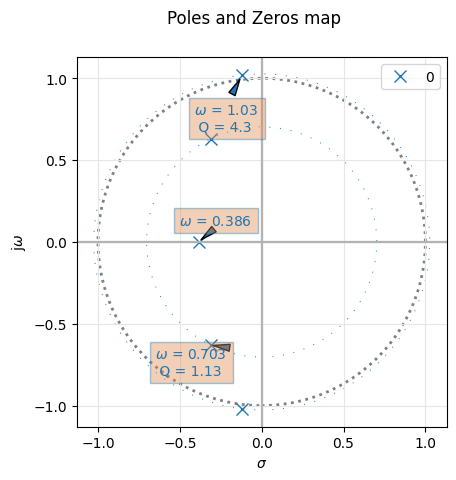

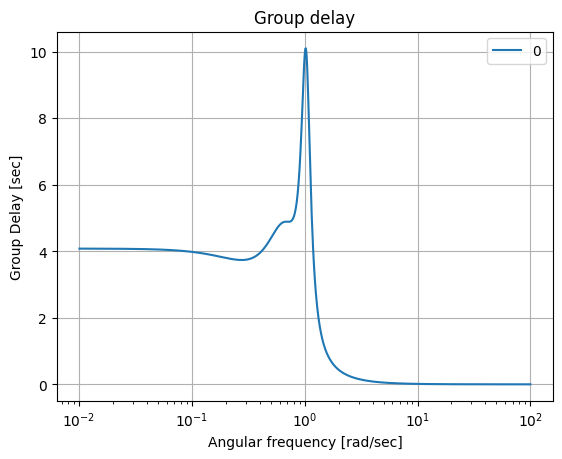

In [150]:
# verifico

# %matplotlib inline

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap

all_sys = []

all_sys.append( sig.TransferFunction(num_cheb, den_cheb) )

figaxes = analyze_sys( all_sys )


4. Sintetizar el circuito NORMALIZADO utilizando estructuras Kerwin–Huelsman–Newcomb (KHN, también conocido como Variable de Estado ) saliendo desde la salida V3 como indica el siguiente circuito de referencia:

<center> <img src="image_KHN.png" style="width:600px; height:300px"> <center>


><center> <img src="TS4_2.0_1.jpg" style="width:600px"> <center>
><center> <img src="TS4_2.0_2.jpg" style="width:600px"> <center>
><center> <img src="TS4_2.0_3.jpg" style="width:600px"> <center>

* Simulacion en LTSpice:
>
> <center> <img src="Draft_KHN2.0.png" style="width:1000px"> <center> 
> <center> <img src="Simulacion_KHN_2.0.png" style="width:800px 600"> <center> 

> Conclusiones:
>> Se cometio un error al calcular la funcion transferencia, el cual
>> se vio reflejado en el resultado final gracias a la simulacion circuital en LTSpice  